In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name

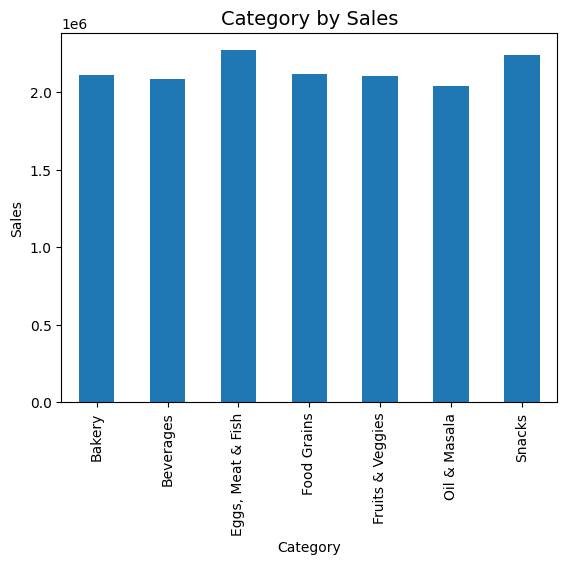

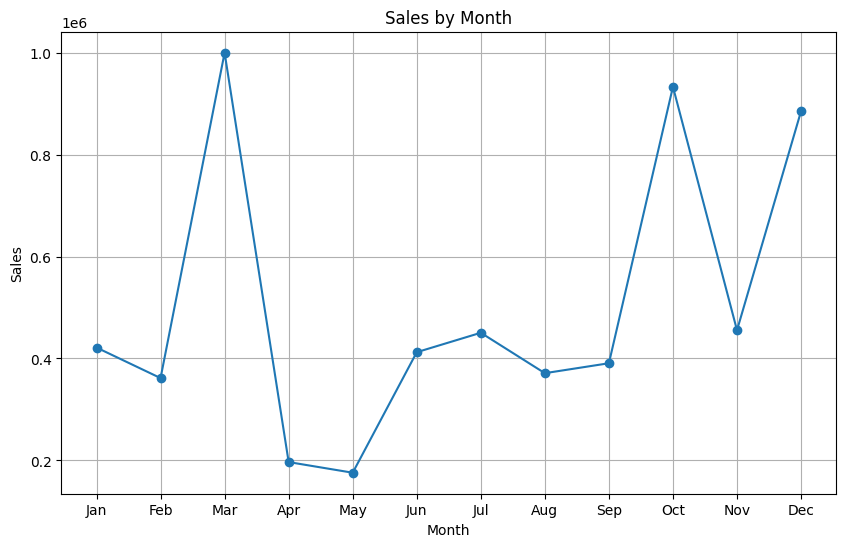

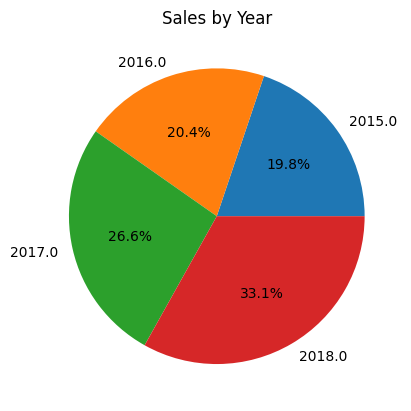

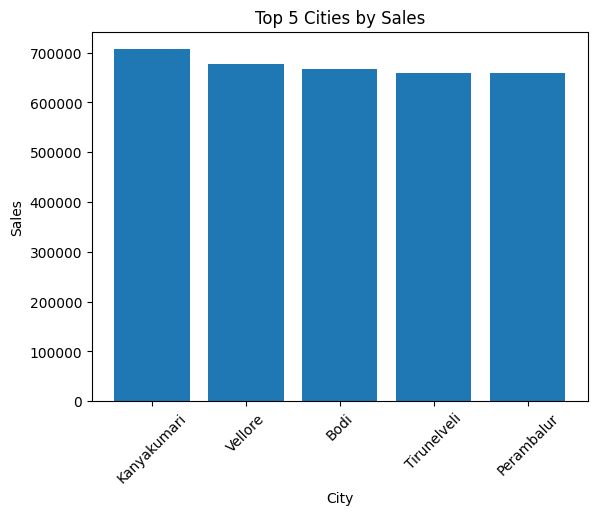

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df=pd.read_csv('/kaggle/input/supermartgrocerysales/SupermartGrocerySales-RetailAnalyticsDataset.csv')
#display the first five rows of the data
df.head()

# lets check data type of each column of the dataset
df.info()

#Let's change the datatype of Order Date from object to date
df ['Order Date'] = pd.to_datetime (df ['Order Date'],errors='ignore')

#changed to date data type
df.info()

# applying groupby() function to
# group the data on Category.
da=df.groupby("Category")
da.first()

#we want to find the total sale by category
# firstly, we group by Category and get the total number of sales for each category
Sales_category=df.groupby("Category")["Sales"].sum()
#we create a plot of sales by category
Sales_category.plot(kind='bar')
plt.title('Category by Sales', fontsize = 14)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

# Ensure the 'Order Date' column is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract month number, month name, and year
df['month_no'] = df['Order Date'].dt.month
df['Month'] = df['Order Date'].dt.strftime('%B')
df['year'] = df['Order Date'].dt.year


#check the data to view the added columns
df.head()

# Sum up sales by month
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
# Sort the data by month
monthly_sales_sorted = monthly_sales.sort_values(by='Month')
# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_sorted['Month'],monthly_sales_sorted['Sales'], marker='o')
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(monthly_sales_sorted['Month'], ['Jan', 'Feb', 'Mar','Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

#we want to find the Yearly Sales
# we group by Year and get the total number of sales for each year
Yearly_Sales=df.groupby("year")["Sales"].sum()
# we create a pie chart with the sales by year
plt.pie(Yearly_Sales, labels=Yearly_Sales.index,autopct='%1.1f%%')
plt.title('Sales by Year')
plt.show()
#Monthly_Sales.plot(kind='pie')
#plt.title('Yearly Sales', fontsize = 14)
#plt.show()

# Step 1: Extract relevant columns
city_sales = df[['City', 'Sales']]
# Step 2: Calculate total sales per city
total_sales = city_sales.groupby('City').sum()
# Step 3: Sort the cities by sales
sorted_cities = total_sales.sort_values(by='Sales',ascending=False)
# Step 4: Select the top 5 cities
top_cities = sorted_cities.head(5)
# Step 5: Plot the bar chart
plt.bar(top_cities.index, top_cities['Sales'])
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Top 5 Cities by Sales')
plt.xticks(rotation=45)
plt.show()
